# Read and Visualize Json data


## JSON

"JSON (JavaScript Object Notation, pronounced /ˈdʒeɪsən/; also /ˈdʒeɪˌsɒn/) is an open standard file format and data interchange format that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and arrays (or other serializable values). It is a common data format with diverse uses" (Wiki)



## Data Source: GADM

GADM wants to map the administrative areas of all countries, at all levels of sub-division. We provide data at high spatial resolutions that includes an extensive set of attributes. 

https://gadm.org/index.html

---
DTR

# Import Packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
import cartopy.io.img_tiles as cimgt
#NB: Stamen basemaps are not be available from the usual source from 31 Oct 2023

In [5]:
import geopandas as gpd

In [6]:
gpd.__version__

'0.13.2'

In [7]:
import fiona

In [8]:
fiona.__version__

'1.9.4'

In [9]:
import os

## Fiona house-keeping

**NB** The KML driver isn't enabled by default in Fiona. You have to enable it.

In [10]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [11]:
##gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## Directory Management

In [12]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

In [13]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/'

In [14]:
# list the files in the directory
#os.listdir(dir_data)

change directory

os.chdir(dir_data)

os.getcwd()

# Filename

In [15]:
fname_data =   os.path.join(dir_data, 'gadm41_KEN_0.json')
fname_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/GADM_maps/gadm41_KEN_0.json'

# Read the data using geopandas

In [16]:
gdf_JSON = gpd.read_file(fname_data, driver='GeoJSON')

In [17]:
gdf_JSON

,GID_0,COUNTRY,geometry
0,KEN,Kenya,"MULTIPOLYGON (((39.38010 -4.71790, 39.37740 -4..."


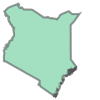

In [18]:
gdf_JSON["geometry"][0]

## Quick plot

<Axes: >

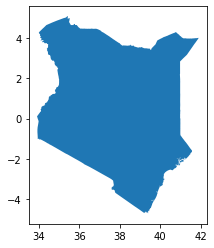

In [19]:
gdf_JSON.plot()#[0]

# Plot using Cartopy

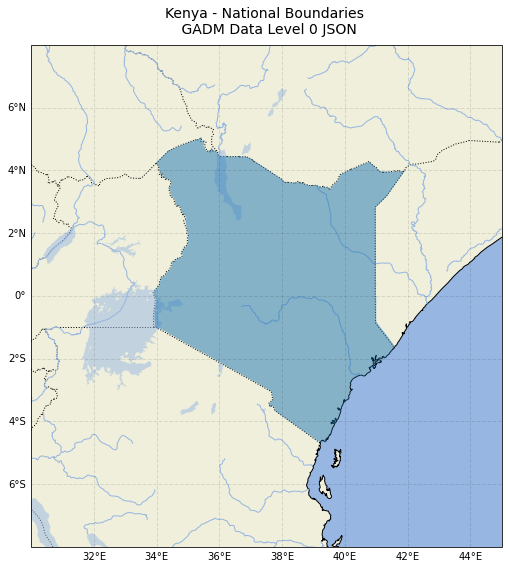

In [20]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([30, 45, -8, 8], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add data
ax.add_geometries(gdf_JSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)

##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('Kenya - National Boundaries \n GADM Data Level 0 JSON',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background

background map

In [21]:
#stamen_terrain = cimgt.Stamen('terrain-background')
#Note Stamen basemap will not be available from 31 Oct 2023

In [22]:
## World Shaded Relief

url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg'
WSR_image = cimgt.GoogleTiles(url=url)

plot

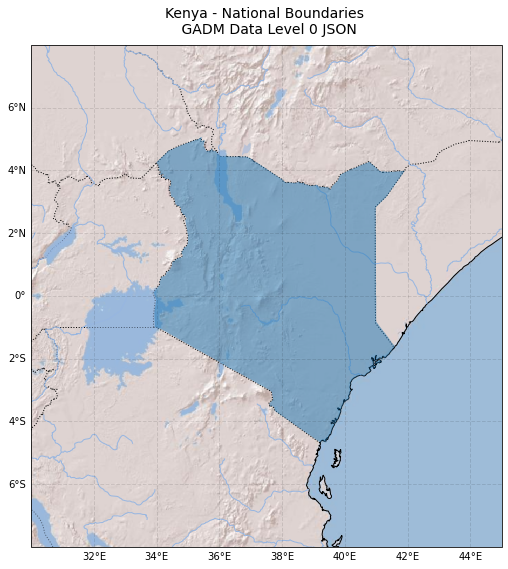

In [23]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([30, 45, -8, 8], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
ax.add_geometries(gdf_JSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)

##### add gridlines and coordinates
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### add title
ax.set_title('Kenya - National Boundaries \n GADM Data Level 0 JSON',
             fontsize = 14,
             y=1.01)

plt.tight_layout()

plt.show()

# Plot using cartopy with the WSR background and an inset

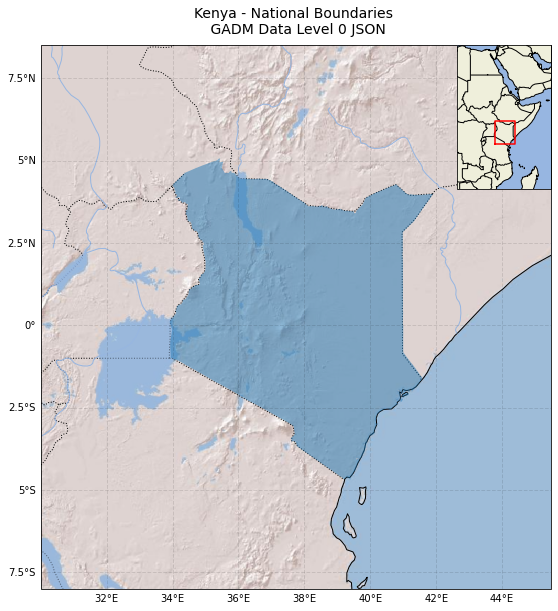

In [32]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([30, 45.5, -8, 8.5], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(WSR_image, 6)

### add data
ax.add_geometries(gdf_JSON["geometry"], crs=ccrs.PlateCarree(), alpha=0.5)

#### add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True


#### add inset
#(left, bottom, width, height)
inset_ax = plt.axes( [0.676, 0.68, 0.25, 0.2], projection=ccrs.PlateCarree() )
## define extent of inset
inset_ax.set_extent([20, 55, -20, 32 ] )  # you want this extent bit bigger than your raster extent
#(x,y) coord of the region mapped
x_coord = [34.0, 34.0, 41.8, 41.8, 34.0] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
y_coord = [-3.8, 5, 5, -3.8, -3.8] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
#add features for better context
inset_ax.add_feature(cfeature.BORDERS)
inset_ax.add_feature(cfeature.LAND)
inset_ax.add_feature(cfeature.OCEAN)
inset_ax.add_feature(cfeature.COASTLINE)
#add a red box indicating the location
inset_ax.plot(x_coord, y_coord, transform=ccrs.PlateCarree(), zorder=10, color="red")

### add title
ax.set_title('Kenya - National Boundaries \n GADM Data Level 0 JSON',
             fontsize = 14,
             y=1.01)



plt.show()